# Tl;dr
This notebook contains plotting/statistical analyses of StratifiedKFold results

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator
import matplotlib.patches as mpatches

In [ ]:
def make_boxplot(df, groupby_plots_dict: dict, groupby_key: str, plots_key: str, metric: str):
    sns.set_theme(style='white')
    fig, axes = plt.subplots(2, 3, figsize=(20, 8))
    axes = axes.flatten()

    for i, p in enumerate(groupby_plots_dict[plots_key]):
        ax = axes[i]

        df_plotting = df[(df[plots_key] == p)][[plots_key, groupby_key, metric]].copy()

        dataset_order = (
            df_plotting.groupby(groupby_key)[metric]
            .median()
            .sort_values(ascending=False)
            .index
            .tolist()
        )

        palette = dict(zip(groupby_plots_dict[groupby_key], sns.color_palette("Set2", n_colors=len(groupby_plots_dict[groupby_key]))))

        sns.boxplot(
            x=groupby_key, y=metric, hue=groupby_key,
            data=df_plotting, ax=ax,
            order=dataset_order, palette=palette
        )

        ax.set_title(p)
        ax.set_xlabel('')
        if i != 0:
            ax.set_ylabel('')
        else:
            ax.set_ylabel(f'Cross-Validation {metric}')

        pairs = [(dataset_order[i], dataset_order[j]) for i in range(len(dataset_order)) for j in range(i+1, len(dataset_order))]

        annotator = Annotator(ax, pairs=pairs, data=df_plotting,
                              x=groupby_key, y=metric, hue=groupby_key,
                              order=dataset_order)
        annotator.configure(
            test='t-test_paired',
            comparisons_correction='Holm-Bonferroni',
            text_format='simple',
            loc='inside'
        )
        annotator.apply_and_annotate()

    patches = [mpatches.Patch(color=palette[label], label=label) for label in groupby_plots_dict[groupby_key]]
    fig.legend(
        handles=patches, title=groupby_key,
        loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(groupby_plots_dict[groupby_key]), frameon=False
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# PCA

In [3]:
alldata = pd.read_csv('/Users/daisyliu/Desktop/Care4Minds/stratifiedkfold/care4minds_stratifiedkfold_all-data_Jun30.csv')
alldata.head()

,model,dataset,fold,train_acc,test_acc,train_auc,test_auc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,KNN,no embeddings,fold_1,0.999095,0.658395,0.999998,0.728902,0.998279,0.671301,0.999912,0.315858,0.999095,0.429588
1,KNN,no embeddings,fold_2,0.999327,0.662924,0.999999,0.731424,0.998742,0.672294,0.999912,0.319581,0.999327,0.433225
2,KNN,no embeddings,fold_3,0.999239,0.662277,0.999999,0.728387,0.998632,0.669911,0.999845,0.318658,0.999238,0.431882
3,KNN,no embeddings,fold_4,0.999250,0.664180,0.999999,0.736009,0.998632,0.684211,0.999867,0.322596,0.999249,0.438463
4,KNN,no embeddings,fold_5,0.999184,0.665626,0.999999,0.728636,0.998500,0.670109,0.999867,0.321364,0.999183,0.434402


In [11]:
set(alldata['dataset'])

{'combined_combined_pca_128',
 'combined_isolated_pca_128',
 'combined_isolated_pca_256',
 'combined_isolated_pca_512',
 'no embeddings'}

In [30]:
alldata_plotting = alldata[(alldata['dataset'] != 'combined_combined_pca_128')].copy()

alldata_plotting.replace({
    'combined_isolated_pca_128': 'pca_128',
    'combined_isolated_pca_256': 'pca_256',
    'combined_isolated_pca_512': 'pca_512',
    'no embeddings': 'no embed'
    }, inplace=True)

no embed vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:3.370e-08 t=1.723e+01
pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:1.660e-09 t=2.423e+01
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:2.251e-12 t=5.074e+01
no embed vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:3.452e-10 t=2.891e+01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.888e-13 t=6.687e+01
no embed vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.757e-13 t=6.741e+01
pca_256 vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:4.246e-01 t=-8.363e-01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:5.046e-06 t=9.594e+00
pca_512 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:1.124e-08 t=1.952e+01
pca_256 vs. pca_512: t-test paired samples with Holm-Bonfer

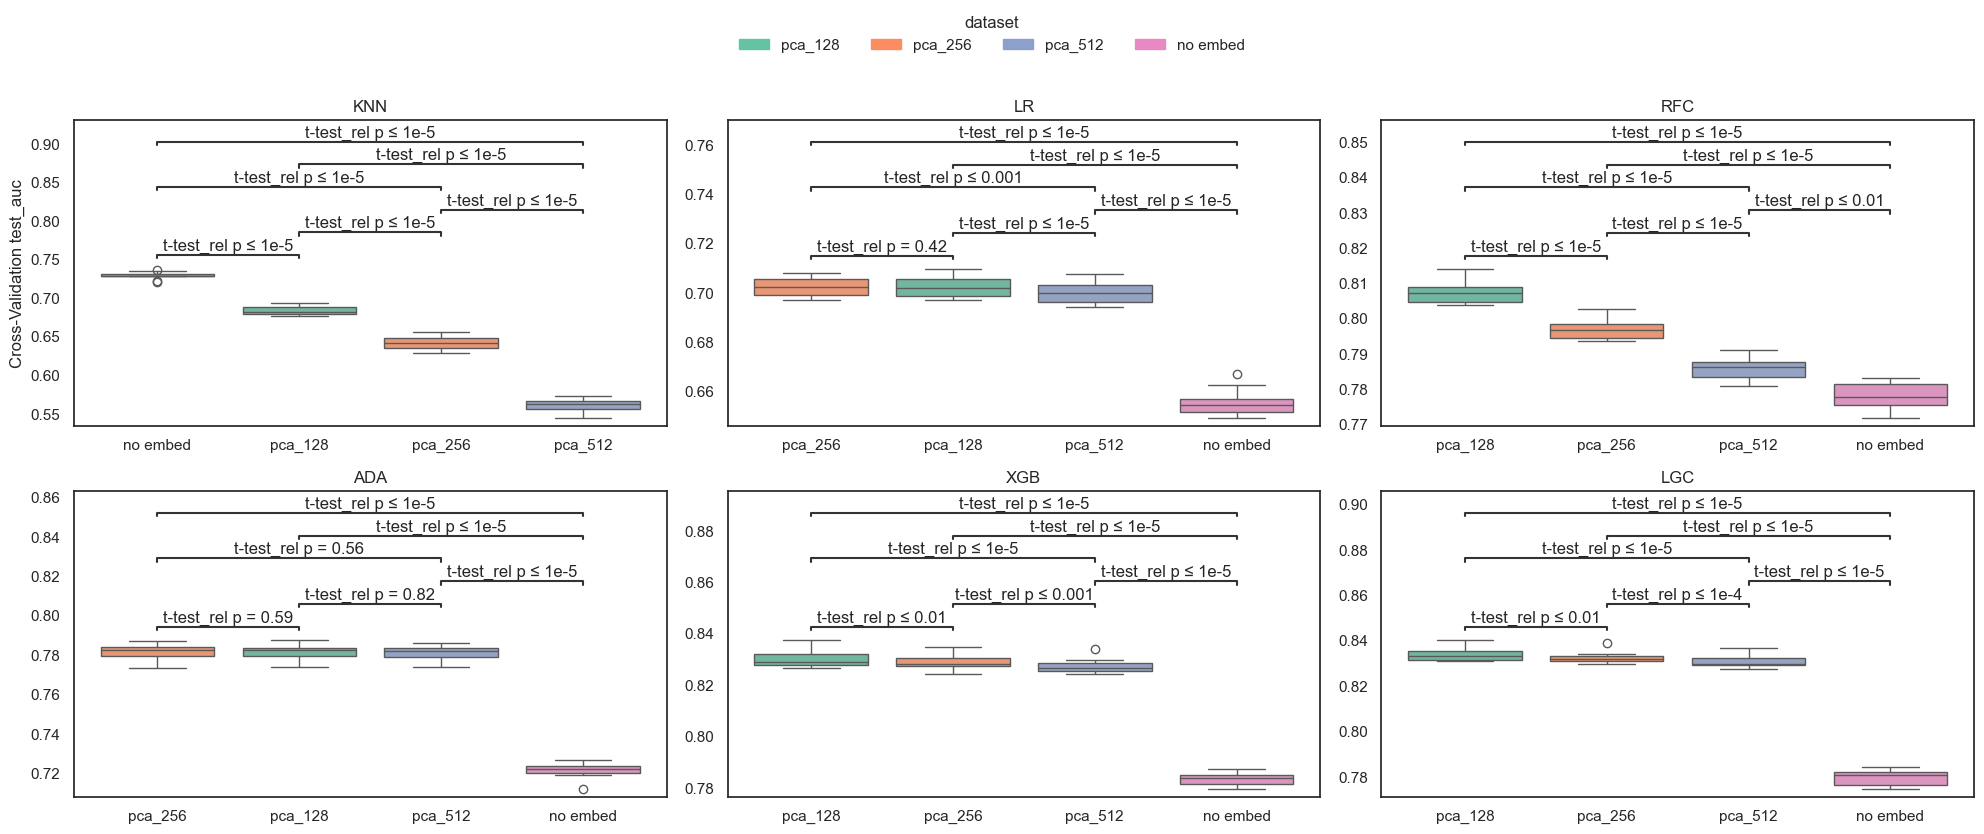

In [34]:
groupby_plots_dict = {
    'dataset': ['pca_128', 'pca_256', 'pca_512', 'no embed'],
    'model': ['KNN', 'LR', 'RFC', 'ADA', 'XGB', 'LGC']
}
make_boxplot(df=alldata_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_auc')

no embed vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:2.755e-17 t=1.786e+02
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.413e-01 t=1.613e+00
pca_512 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:3.445e-03 t=3.933e+00
no embed vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:8.623e-13 t=5.647e+01
pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:6.907e-09 t=2.063e+01
no embed vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:4.411e-16 t=1.312e+02
pca_512 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:8.890e-01 t=1.436e-01
pca_256 vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:9.104e-03 t=3.309e+00
pca_128 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:6.472e-10 t=2.694e+01
pca_512 vs. pca_128: t-test paired samples with Holm-Bonferr

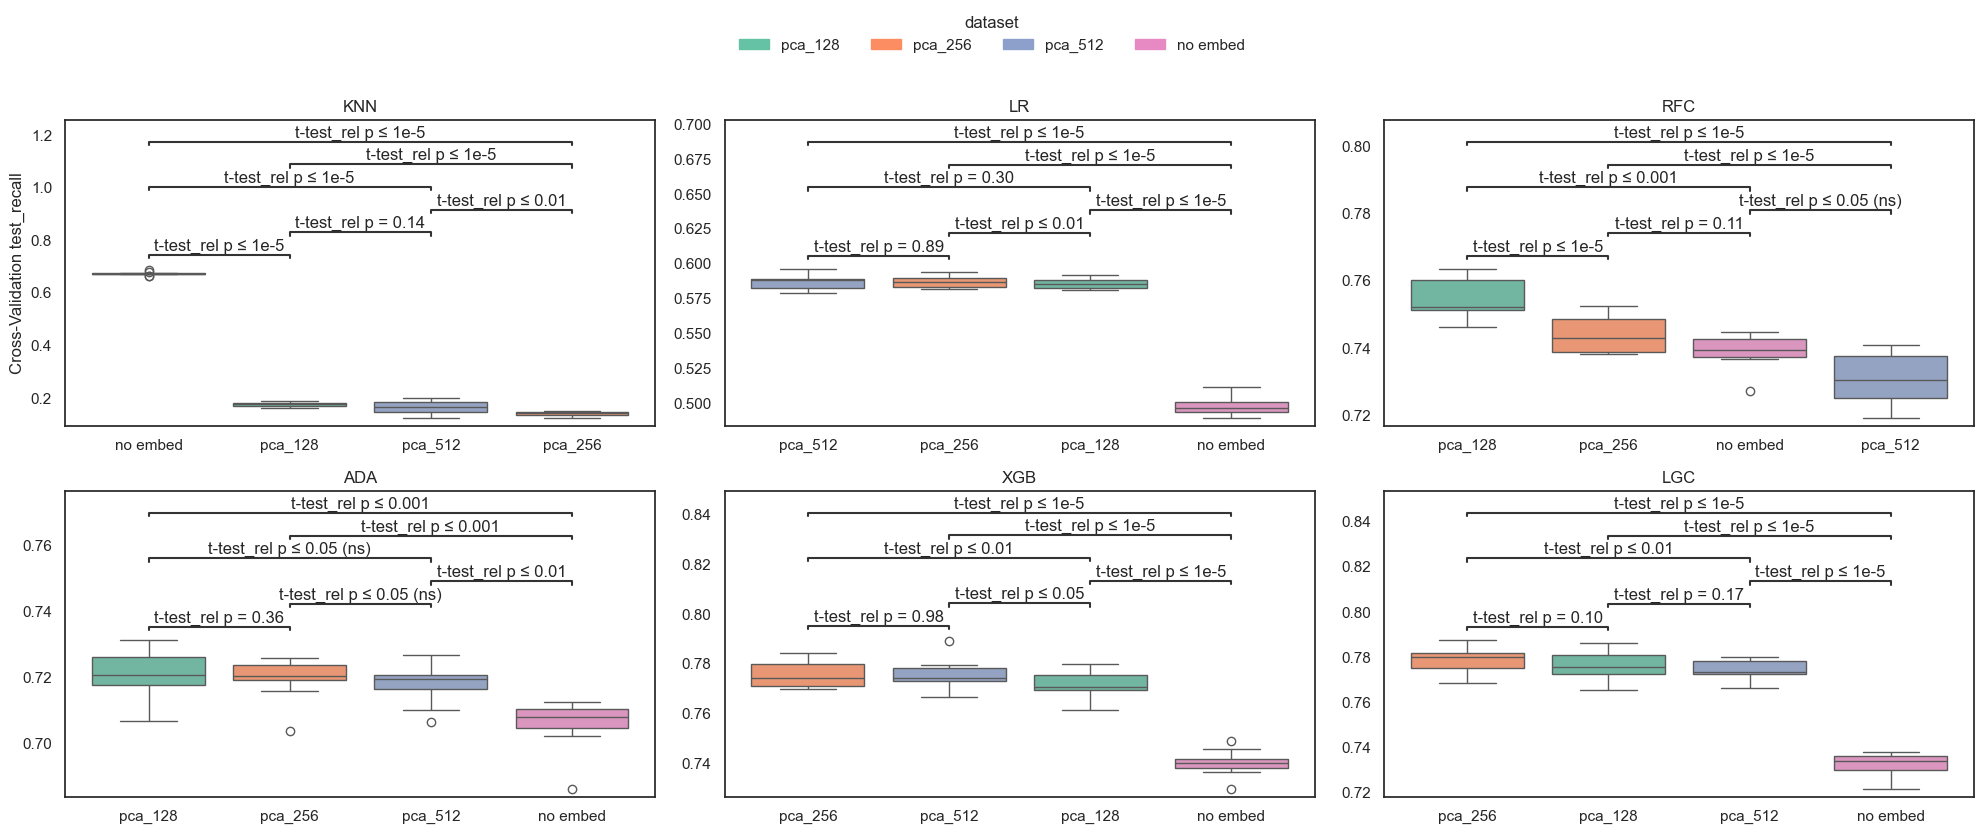

In [35]:
make_boxplot(df=alldata_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_recall')

pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:2.206e-04 t=5.930e+00
pca_256 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:1.468e-06 t=1.112e+01
no embed vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:6.190e-01 t=5.150e-01
pca_128 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:7.057e-11 t=3.454e+01
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:2.526e-07 t=1.367e+01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.353e-07 t=1.469e+01
no embed vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:2.386e-01 t=1.262e+00
pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:9.225e-01 t=1.001e-01
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.557e-02 (ns) t=2.975e+00
no embed vs. pca_256: t-test paired samples with Holm-B

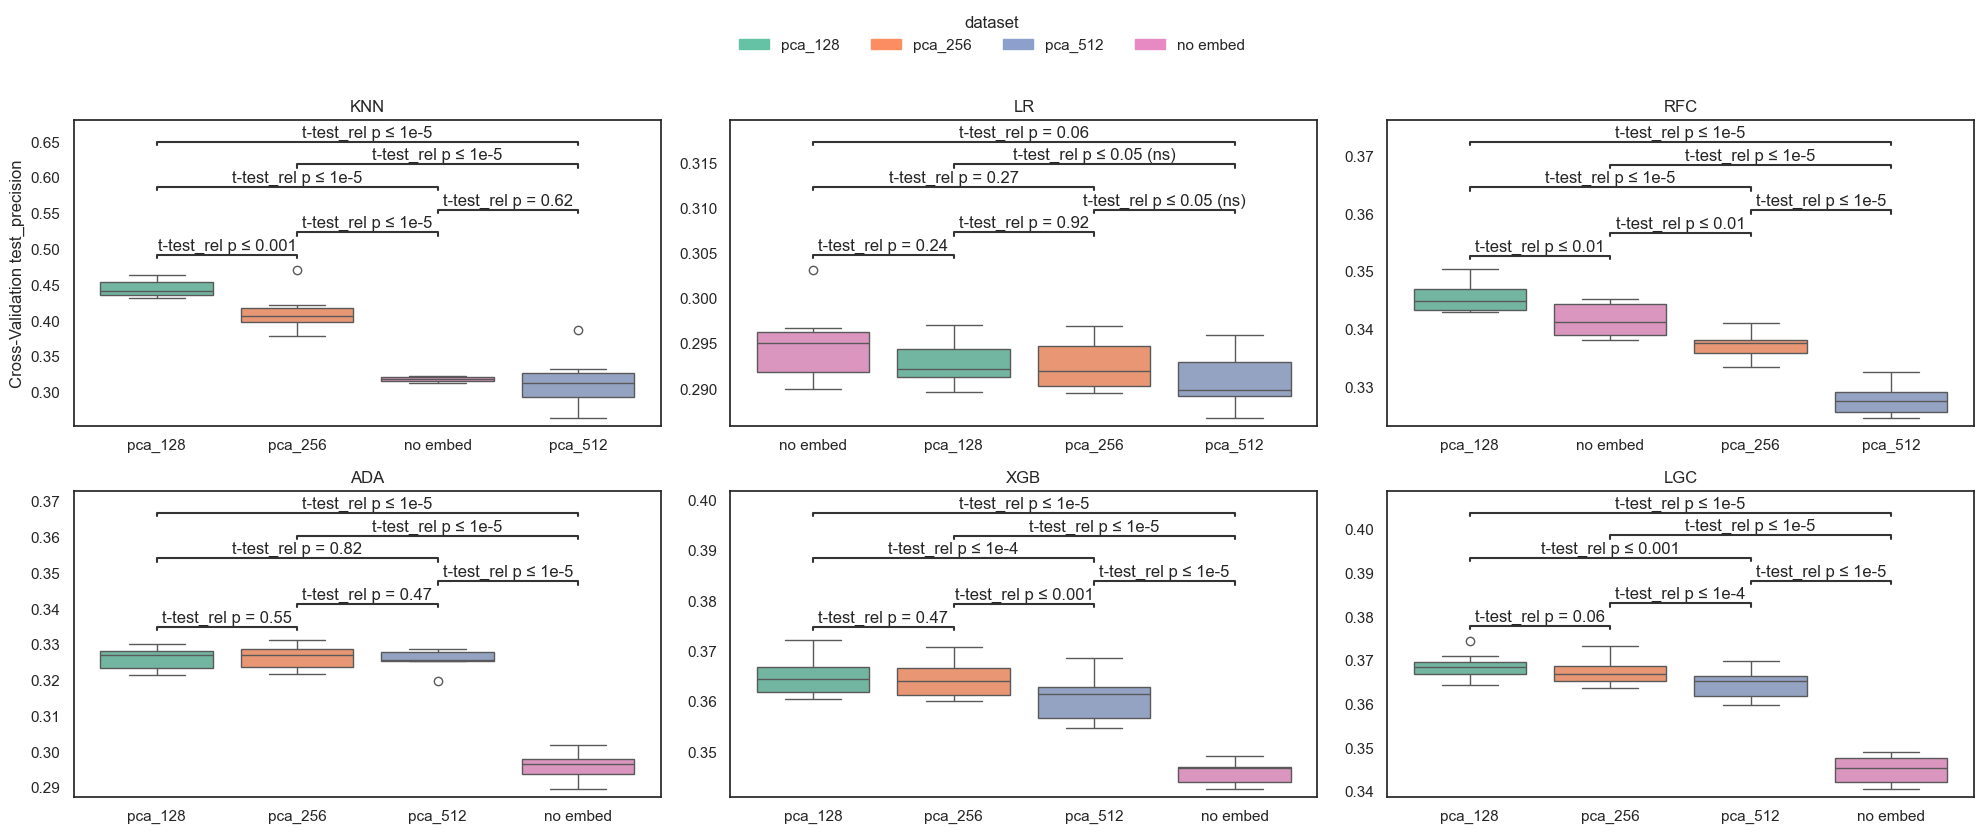

In [36]:
make_boxplot(df=alldata_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_precision')

no embed vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:3.507e-14 t=8.065e+01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.036e-05 t=8.789e+00
pca_512 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:1.424e-01 t=1.608e+00
no embed vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:2.999e-11 t=3.801e+01
pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:2.671e-09 t=2.297e+01
no embed vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:1.501e-13 t=6.860e+01
pca_256 vs. pca_128: t-test paired samples with Holm-Bonferroni correction, P_val:6.140e-01 t=5.224e-01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:7.440e-02 t=2.018e+00
pca_512 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:2.191e-05 t=8.010e+00
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferr

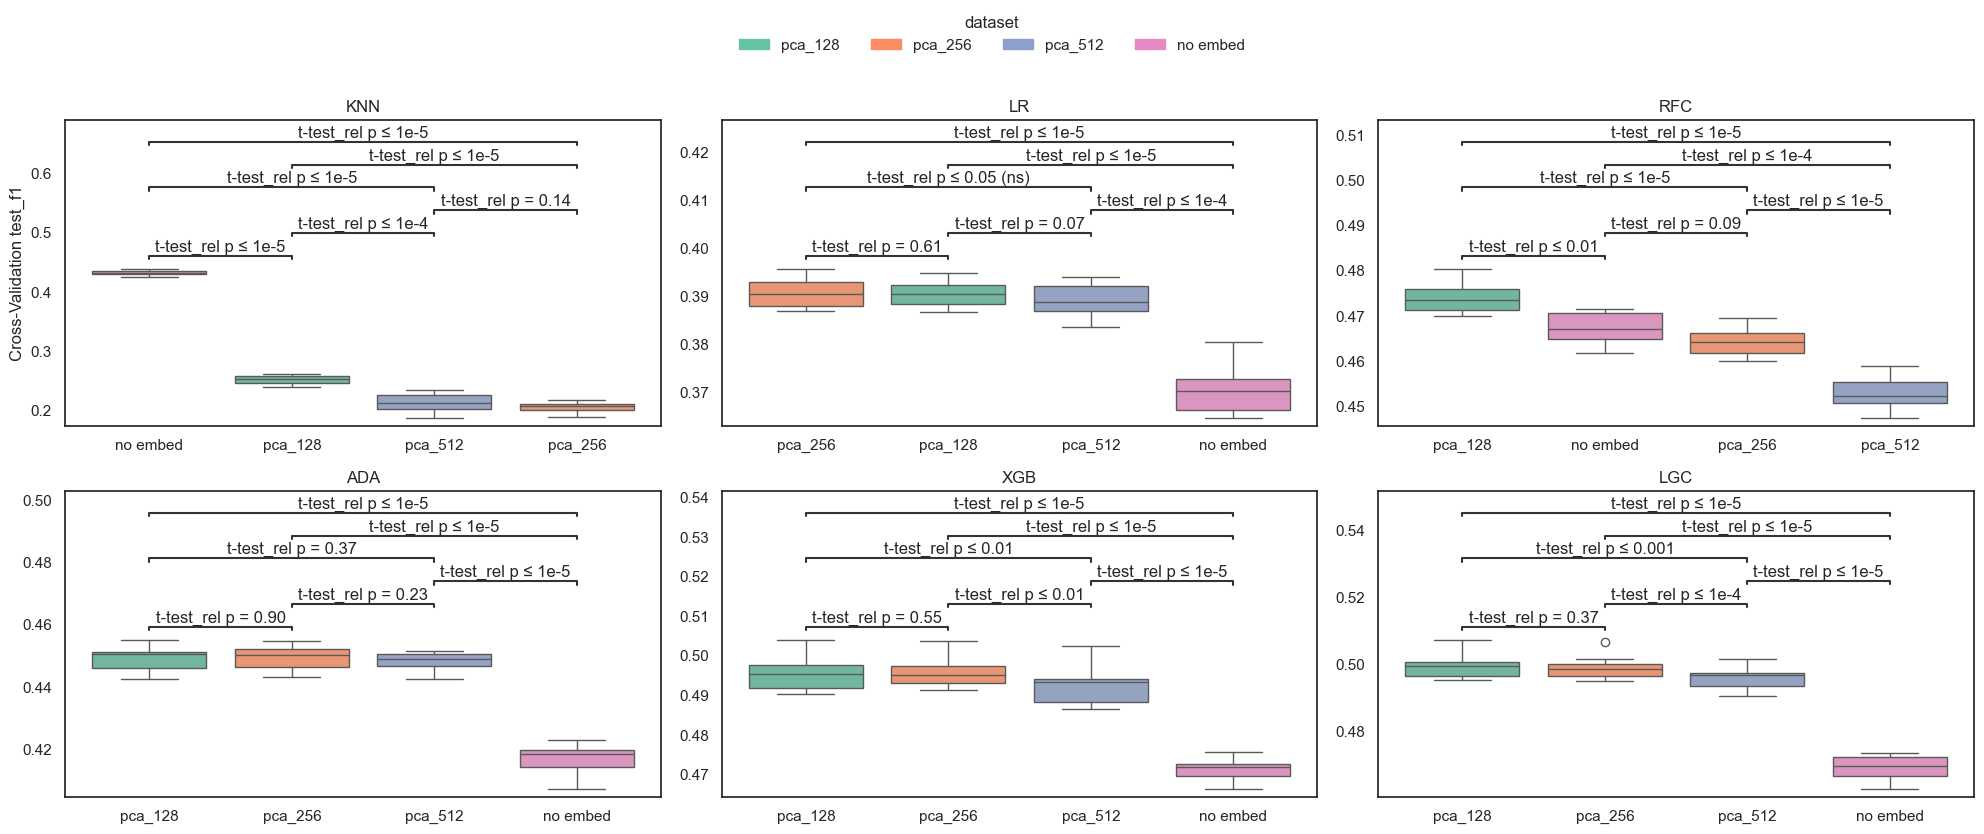

In [37]:
make_boxplot(df=alldata_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_f1')

pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:4.108e-03 t=3.817e+00
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:1.216e-04 t=6.426e+00
pca_512 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:1.572e-10 t=3.158e+01
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:9.729e-05 t=6.618e+00
pca_256 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:1.295e-14 t=9.011e+01
pca_128 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:8.244e-16 t=1.224e+02
pca_128 vs. pca_256: t-test paired samples with Holm-Bonferroni correction, P_val:5.201e-01 t=6.693e-01
pca_256 vs. pca_512: t-test paired samples with Holm-Bonferroni correction, P_val:6.518e-03 t=3.520e+00
pca_512 vs. no embed: t-test paired samples with Holm-Bonferroni correction, P_val:2.923e-05 t=7.725e+00
pca_128 vs. pca_512: t-test paired samples with Holm-Bonferr

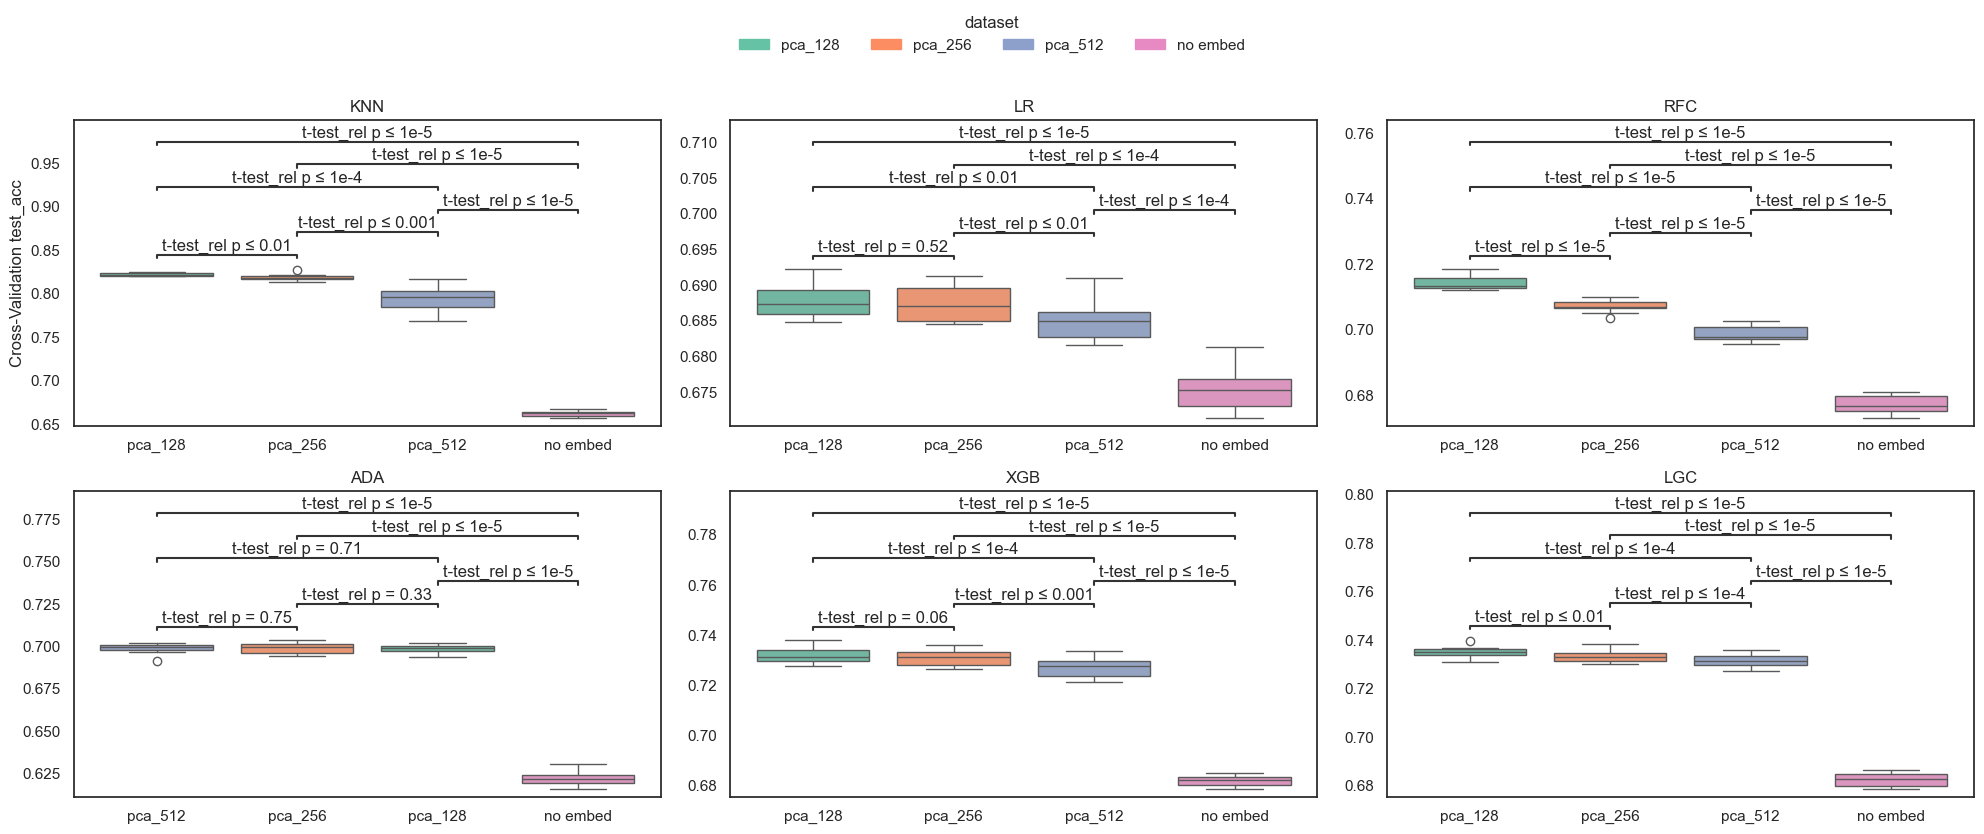

In [38]:
make_boxplot(df=alldata_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_acc')

# Leadtimes

In [39]:
leadtimes = pd.read_csv('/Users/daisyliu/Desktop/Care4Minds/stratifiedkfold/care4minds_stratifiedcv_lead-times_pca_128_scores_Jun30.csv')
leadtimes.head()

,model,dataset,fold,train_acc,test_acc,train_auc,test_auc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1
0,KNN,3_months_pca_128,fold_1,1.0,0.819466,1.0,0.677117,1.0,0.263729,1.0,0.340332,1.0,0.297173
1,KNN,3_months_pca_128,fold_2,1.0,0.820144,1.0,0.674191,1.0,0.251525,1.0,0.337273,1.0,0.288155
2,KNN,3_months_pca_128,fold_3,1.0,0.824707,1.0,0.664236,1.0,0.218718,1.0,0.336991,1.0,0.265268
3,KNN,3_months_pca_128,fold_4,1.0,0.822597,1.0,0.659805,1.0,0.210580,1.0,0.325301,1.0,0.255661
4,KNN,3_months_pca_128,fold_5,1.0,0.827307,1.0,0.664288,1.0,0.237030,1.0,0.355003,1.0,0.284262


In [43]:
leadtimes_plotting = leadtimes.replace({'3_months_pca_128': '3mo',
                                        '6_months_pca_128': '6mo',
                                        '12_months_pca_128': '12mo'}).copy()

groupby_plots_dict = {
    'dataset': ['3mo', '6mo', '12mo'],
    'model': ['KNN', 'LR', 'RFC', 'ADA', 'XGB', 'LGC']
}

3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.822e-01 t=1.446e+00
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.591e-01 t=-3.162e-01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.178e-01 t=1.729e+00
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.440e-01 t=1.600e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:9.045e-01 t=-1.234e-01
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:3.299e-01 t=1.030e+00
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.551e-01 t=1.552e+00
6mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:6.541e-01 t=4.634e-01
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:5.119e-02 t=2.248e+00
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:3.263e-01 t=1.038e+00
6mo vs. 3mo: t-test paired samp

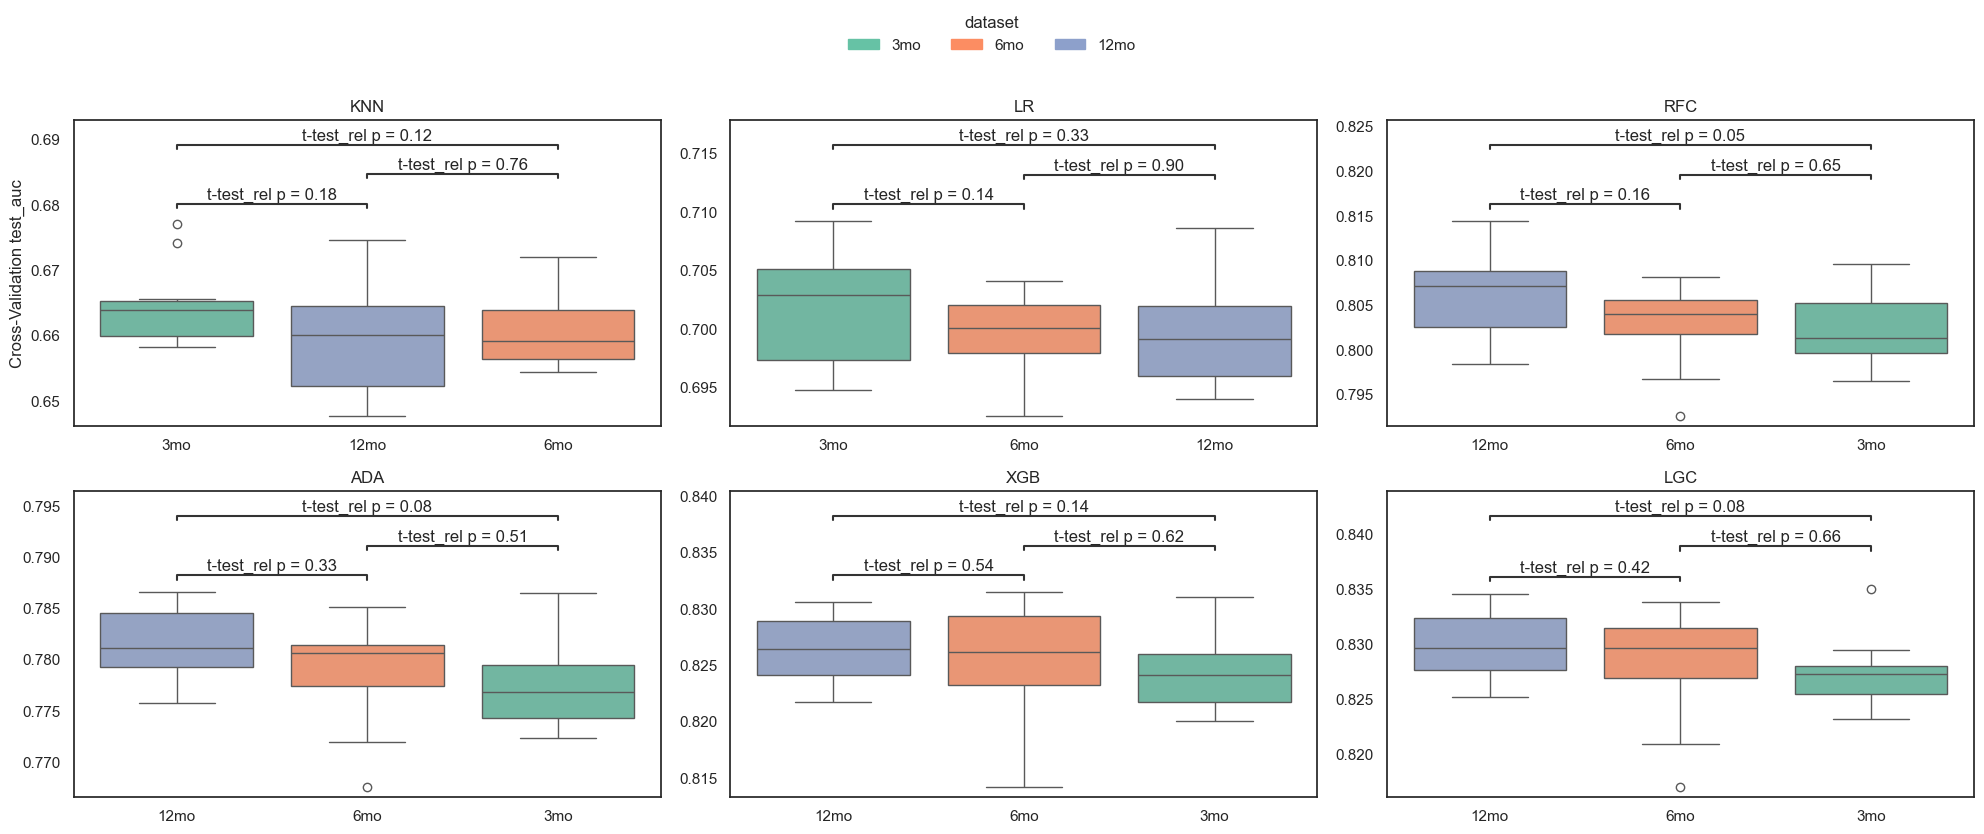

In [46]:
make_boxplot(df=leadtimes_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_auc')

12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.419e-06 t=9.156e+00
6mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.886e-03 t=4.050e+00
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.820e-06 t=1.084e+01
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.409e-01 t=3.410e-01
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.042e-01 t=1.807e+00
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:8.941e-02 t=1.903e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.554e-01 t=-3.212e-01
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.471e-01 t=1.238e+00
6mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.351e-01 t=1.273e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:6.928e-01 t=-4.080e-01
12mo vs. 3mo: t-test paired sam

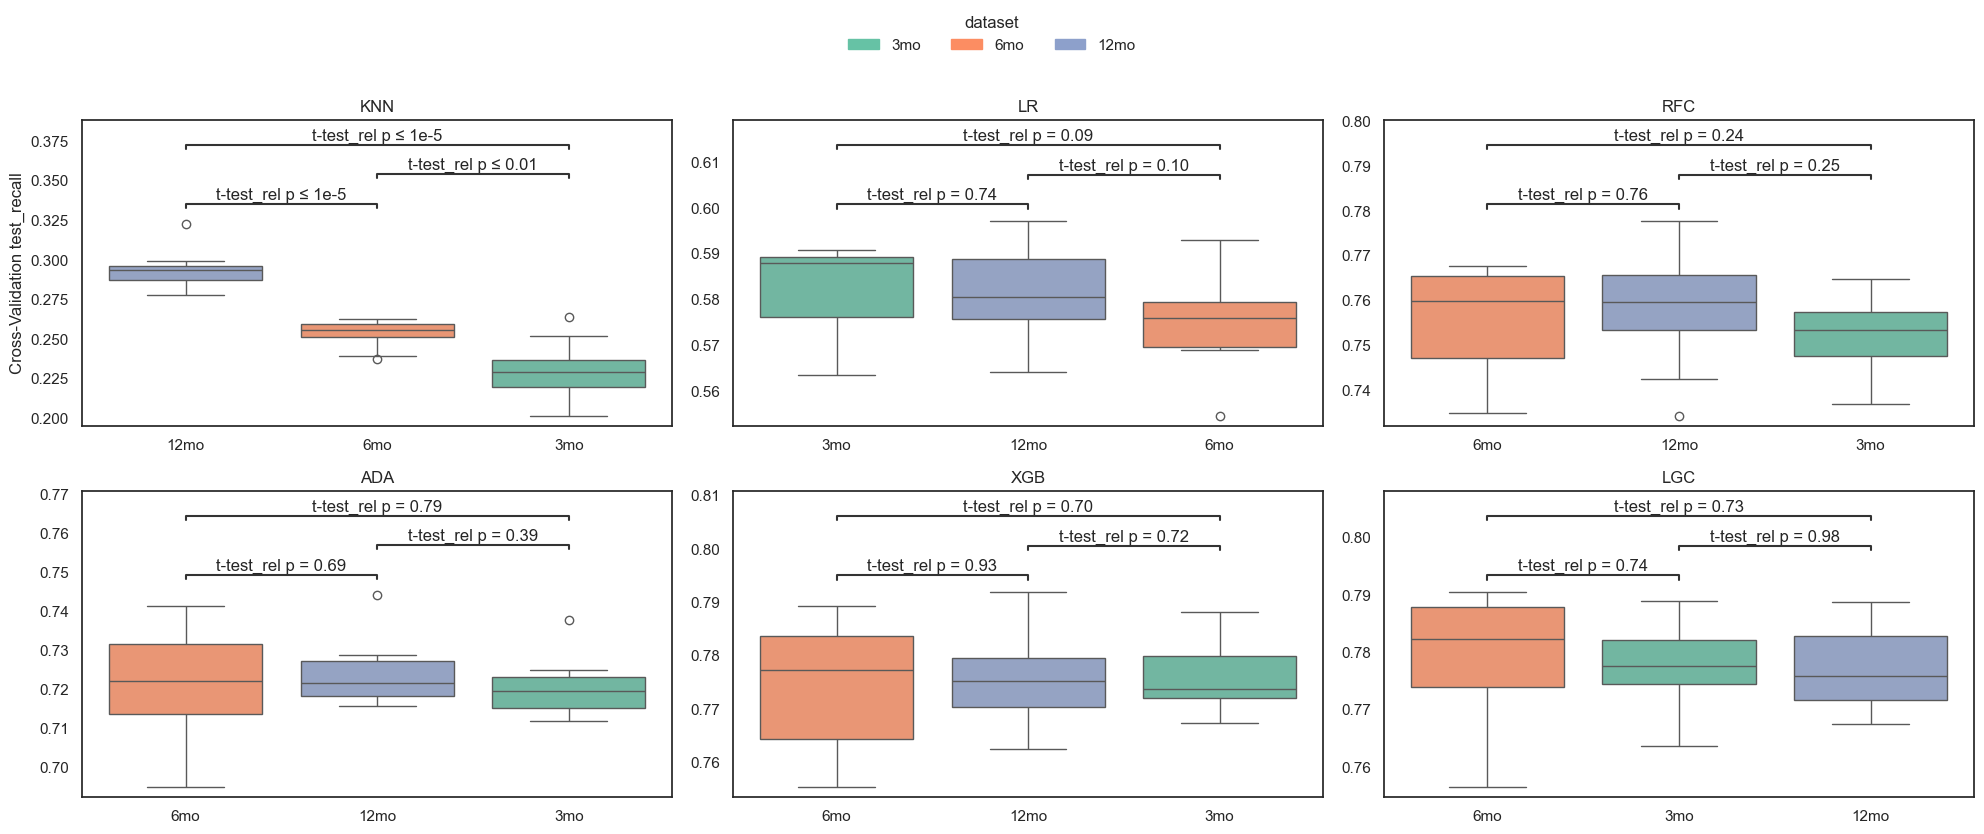

In [47]:
make_boxplot(df=leadtimes_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_recall')

3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.277e-06 t=1.056e+01
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.190e-03 t=4.657e+00
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.281e-06 t=1.130e+01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.874e-06 t=1.080e+01
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.847e-07 t=1.417e+01
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:8.673e-09 t=2.010e+01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.430e-07 t=1.205e+01
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.099e-05 t=8.726e+00
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.699e-07 t=1.431e+01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.551e-04 t=5.813e+00
6mo vs. 12mo: t-test paired sample

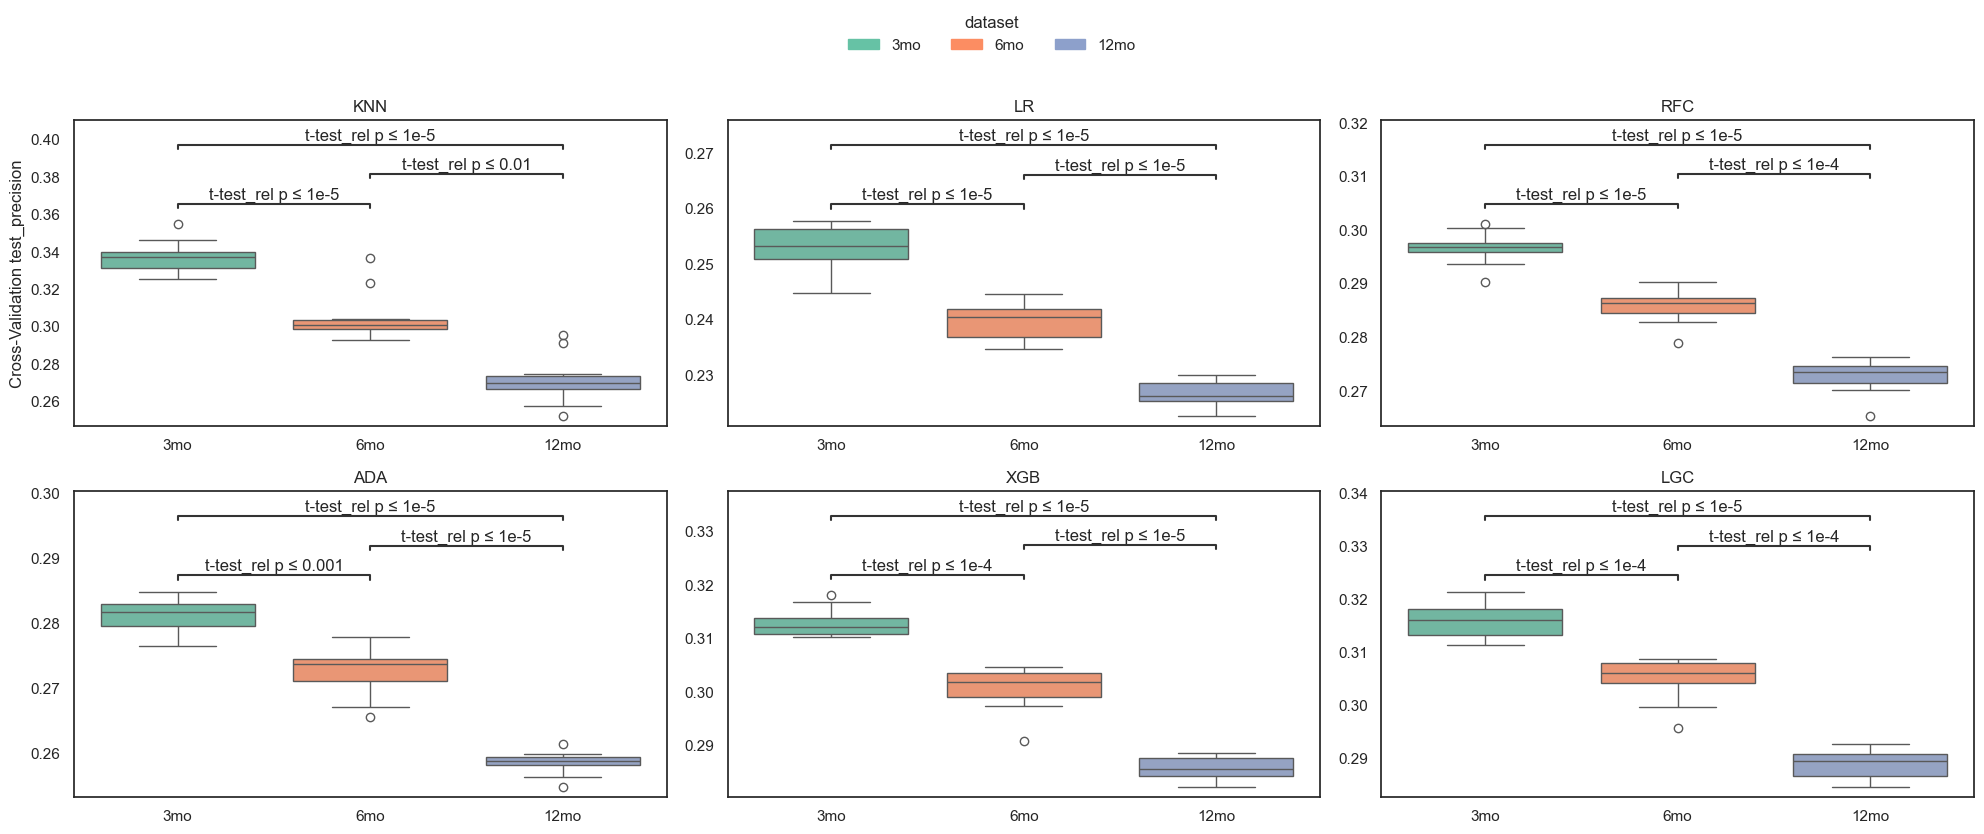

In [48]:
make_boxplot(df=leadtimes_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_precision')

12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.343e-01 t=1.275e+00
6mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:3.436e-01 t=9.996e-01
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.577e-01 t=1.541e+00
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.876e-05 t=8.167e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:9.401e-06 t=8.895e+00
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.625e-07 t=1.438e+01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:5.529e-06 t=9.489e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.852e-04 t=6.073e+00
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.750e-06 t=1.089e+01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.635e-03 t=4.435e+00
6mo vs. 12mo: t-test paired sample

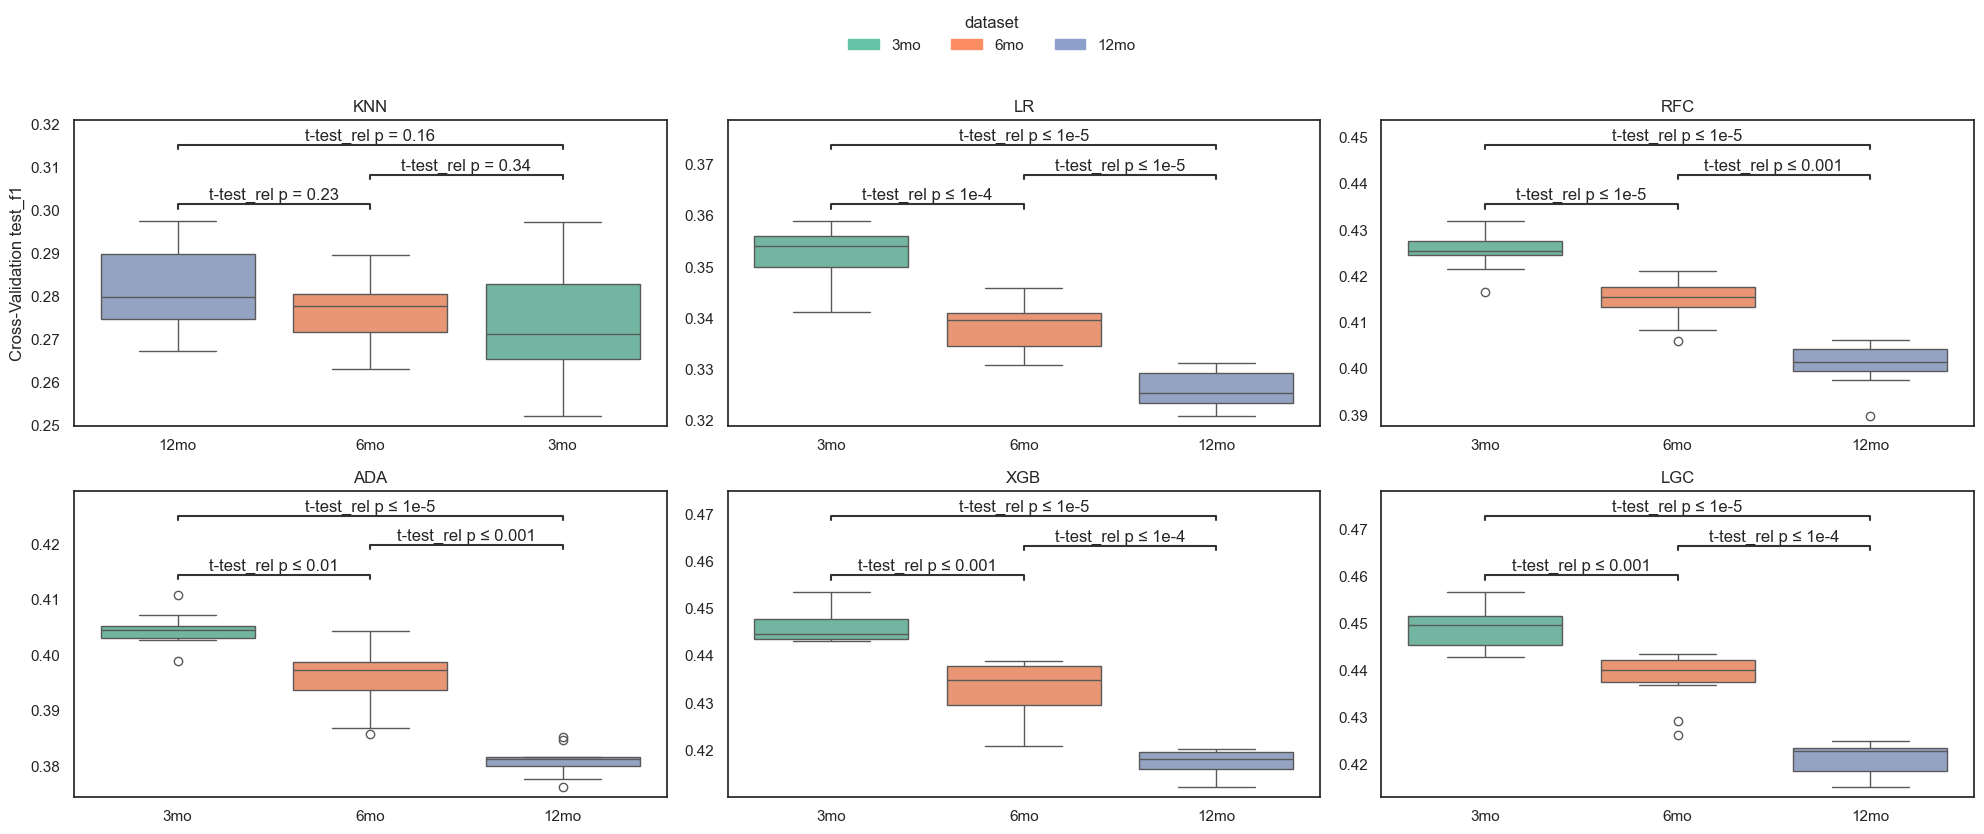

In [49]:
make_boxplot(df=leadtimes_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_f1')

3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.951e-03 t=4.035e+00
6mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.004e-02 t=2.820e+00
3mo vs. 12mo: t-test paired samples with Holm-Bonferroni correction, P_val:6.677e-05 t=6.951e+00
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:6.259e-01 t=5.046e-01
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:3.802e-01 t=9.228e-01
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:7.101e-02 t=2.047e+00
12mo vs. 3mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.322e-01 t=1.655e+00
3mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:4.724e-01 t=7.500e-01
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:2.610e-02 (ns) t=2.659e+00
12mo vs. 6mo: t-test paired samples with Holm-Bonferroni correction, P_val:1.412e-01 t=1.613e+00
6mo vs. 3mo: t-test paired s

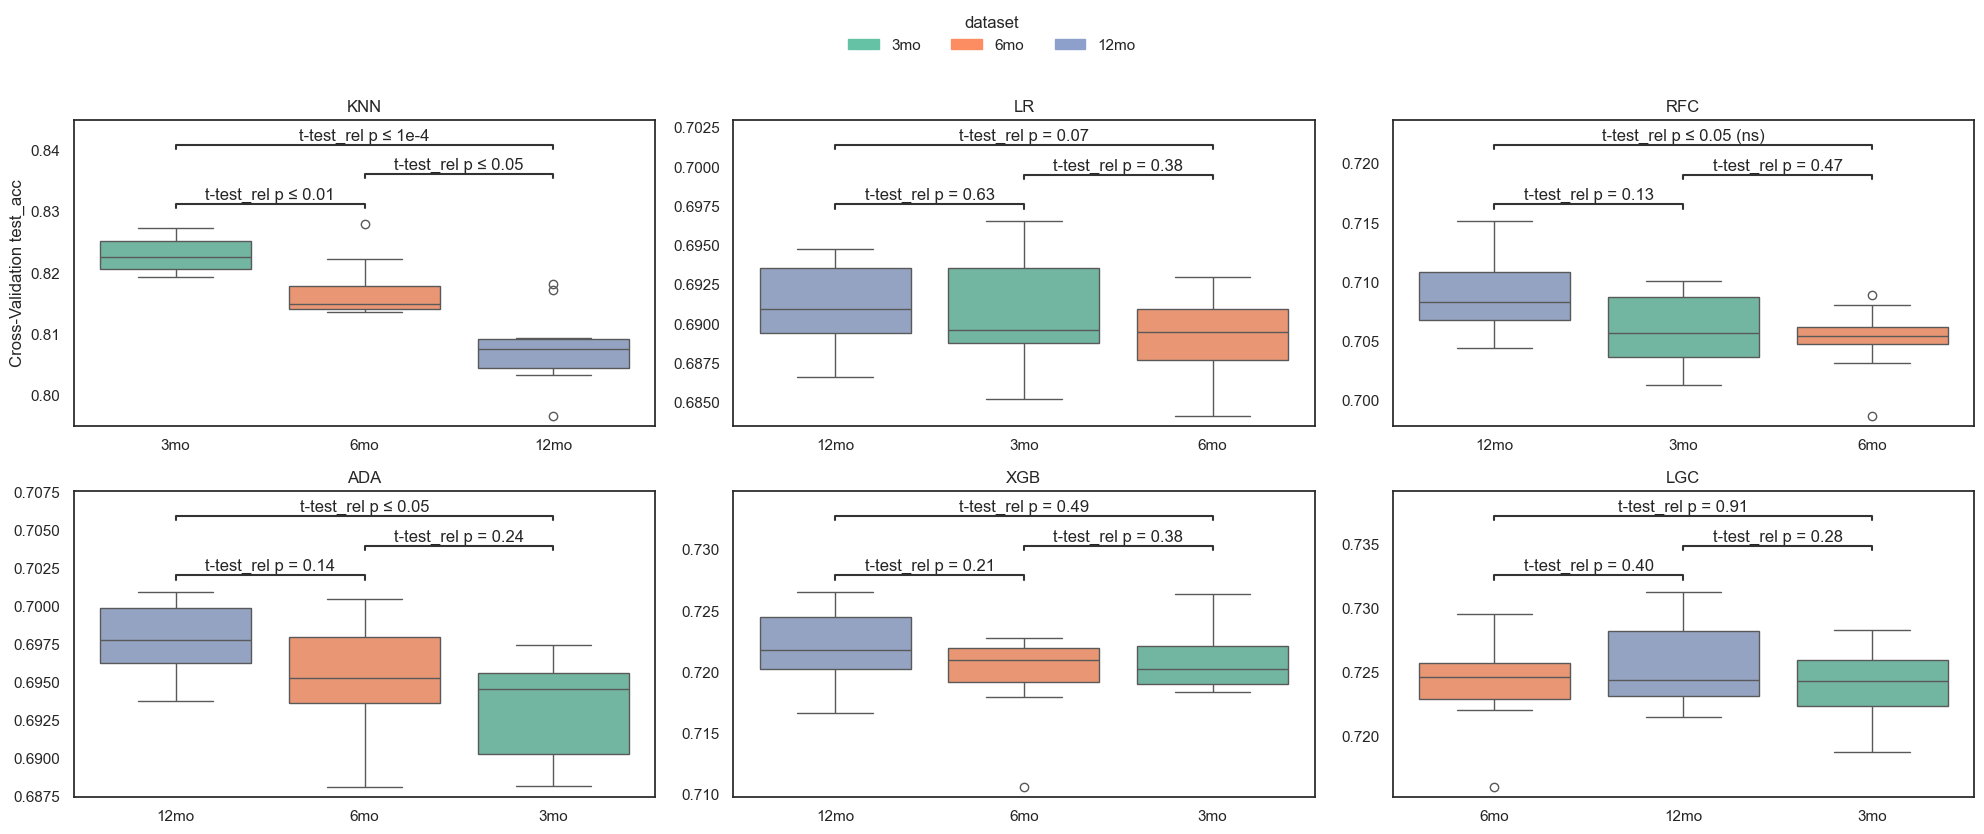

In [50]:
make_boxplot(df=leadtimes_plotting, groupby_plots_dict=groupby_plots_dict,
             groupby_key='dataset', plots_key='model', metric='test_acc')